In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import os
import re
import pandas as pd
import hist
import sys
import matplotlib as mpl
sys.path.append("/uscms/home/sbrightt/nobackup/iDM/iDMe_analysis/CMSSW_10_6_26/src/iDMe/python_analysis/analysisTools")
import plotTools as ptools

In [3]:
f_sig = "signal_2018_aEM.coffea"
sig = util.load(f_sig)[0]

bkg_files = {
    "QCD":"bkg_2018_QCD_TuneCP5_PSWeights.coffea",
    "Top":"bkg_2018_Top.coffea",
    "DY":"bkg_2018_DY.coffea",
    "Diboson":"bkg_2018_Diboson.coffea",
    "Triboson":"bkg_2018_Triboson.coffea",
    "W+jets":"bkg_2018_WJets.coffea",
    "Z+jets":"bkg_2018_ZJets.coffea"
}
bkg_histos = {}
histograms = []
for b in bkg_files.keys():
    bkg_histos[b] = util.load(bkg_files[b])[0]
    histograms = list(bkg_histos[b].keys())
bkg = {}
for h in histograms:
    if type(bkg_histos['QCD'][h]) == hist.Hist and bkg_histos['QCD'][h].sum(flow=True).value > 0:
        bkg[h] = {b:bkg_histos[b][h][{"samp":sum}] for b in bkg_histos.keys()}

In [5]:
cutflows = ['cutDesc', 'cutflow', 'cutflow_cts']
histos = [k for k in sig.keys() if k not in cutflows]
sig_samples = list(sig['cutflow'].keys())
si = pd.DataFrame.from_dict({s:ptools.signalPoint(s) for s in sig_samples},orient='index')
cuts = list(sig['cutflow'][sig_samples[0]].keys())
cutNames = {cname:ptools.getCut(sig['cutDesc'][cname]) for cname in sig['cutDesc'].keys()}
deltas = sorted(list(set(si.delta)))
ctaus = sorted(list(set(si.ctau)))

In [34]:
sig.keys()

dict_keys(['sel_e1_pt', 'sel_e1_trkIso', 'sel_e1_trkRelIso', 'sel_e1_PFRelIso', 'sel_e1_PFRelIso3', 'sel_e1_PFRelIso4', 'sel_e1_PFRelIso8', 'sel_e1_PFIso3', 'sel_e1_PFIso4', 'sel_e1_PFIso8', 'sel_e1_trkChi2', 'sel_e1_trkProb', 'sel_e1_dxy', 'sel_e1_dxySignif', 'sel_e1_angRes', 'sel_e2_pt', 'sel_e2_trkIso', 'sel_e2_trkRelIso', 'sel_e2_PFRelIso', 'sel_e2_PFRelIso3', 'sel_e2_PFRelIso4', 'sel_e2_PFRelIso8', 'sel_e2_PFIso3', 'sel_e2_PFIso4', 'sel_e2_PFIso8', 'sel_e2_trkChi2', 'sel_e2_trkProb', 'sel_e2_dxy', 'sel_e2_dxySignif', 'sel_e2_angRes', 'sel_e1_pt_vs_trkIso', 'sel_e1_pt_vs_trkRelIso', 'sel_e1_pt_vs_chi2', 'sel_e1_chi2_vs_dxy', 'sel_e1_numHits_vs_trkChi2', 'sel_e1_numHits_vs_trkProb', 'sel_e2_pt_vs_trkIso', 'sel_e2_pt_vs_trkRelIso', 'sel_e2_pt_vs_chi2', 'sel_e2_chi2_vs_dxy', 'sel_e2_numHits_vs_trkChi2', 'sel_e2_numHits_vs_trkProb', 'sel_vtx_type', 'sel_vtx_sign', 'sel_vtx_dR', 'sel_vtx_dR_over_pT', 'sel_vtx_dR_over_m', 'sel_vtx_dR_over_pTm', 'sel_vtx_dR_over_mpT', 'sel_vtx_chi2', 'sel

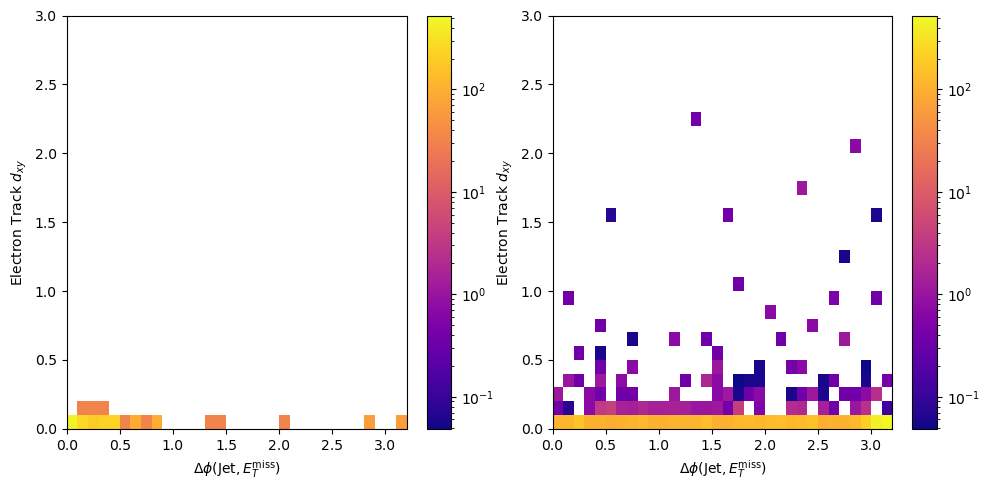

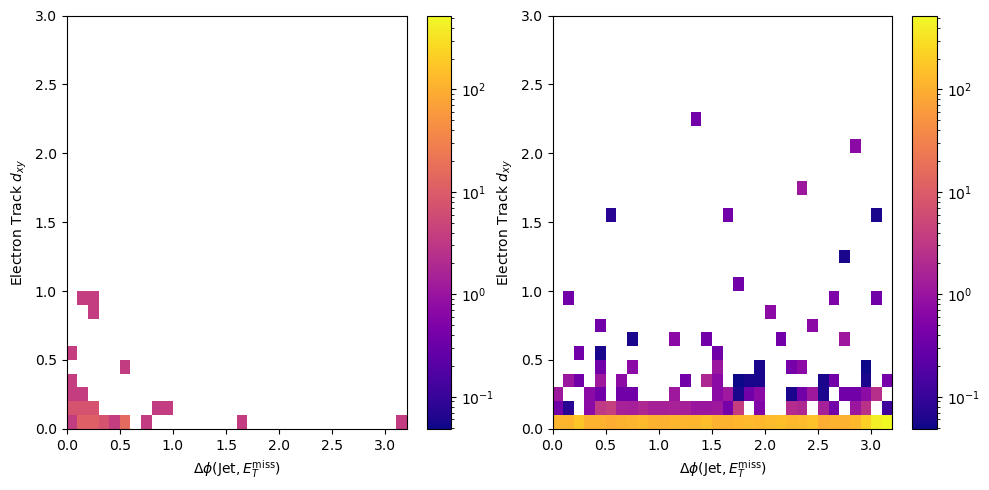

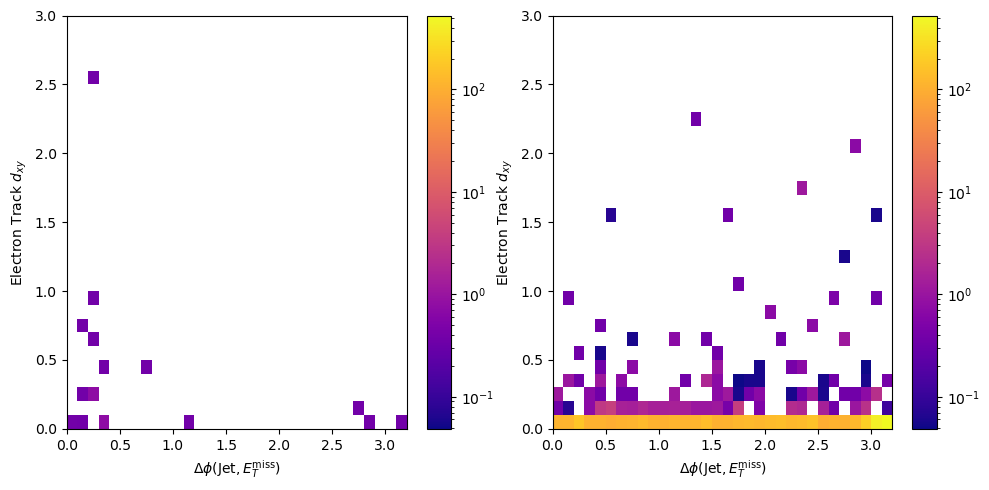

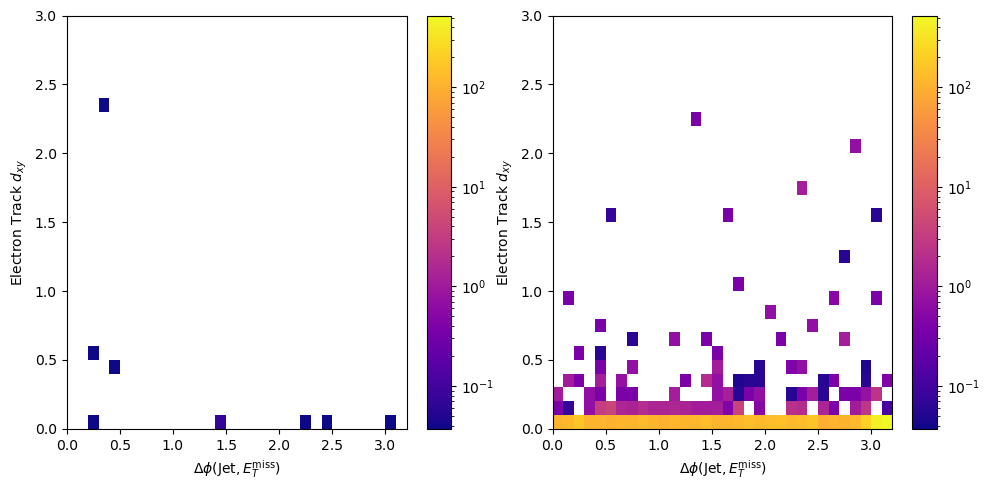

In [28]:
from matplotlib.colors import LogNorm
ctaus = [1,10,100,1000]
hname = 'sel_vtx_METdPhi_vs_mindxy'
for ct in ctaus:
    hs = sig[hname][{"samp":f"sig_2018_Mchi-42p0_dMchi-4p0_ctau-{ct}","cut":"cut13"}]
    hb = sum([bkg[hname][k] for k in bkg[hname].keys()])[{"cut":"cut13"}]
    vmin = min(hs.values()[hs.values()>0].min(),hb.values()[hb.values()>0].min())
    vmax = max(hs.values()[hs.values()>0].max(),hb.values()[hb.values()>0].max())
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    hs.plot2d(norm=LogNorm(vmin=vmin,vmax=vmax),cmap='plasma')
    #cb = plt.gca().images[-1].colorbar
    plt.ylim([0,3])
    plt.subplot(122)
    hb.plot2d(norm=LogNorm(vmin=vmin,vmax=vmax),cmap='plasma')
    plt.tight_layout()
    plt.ylim([0,3])

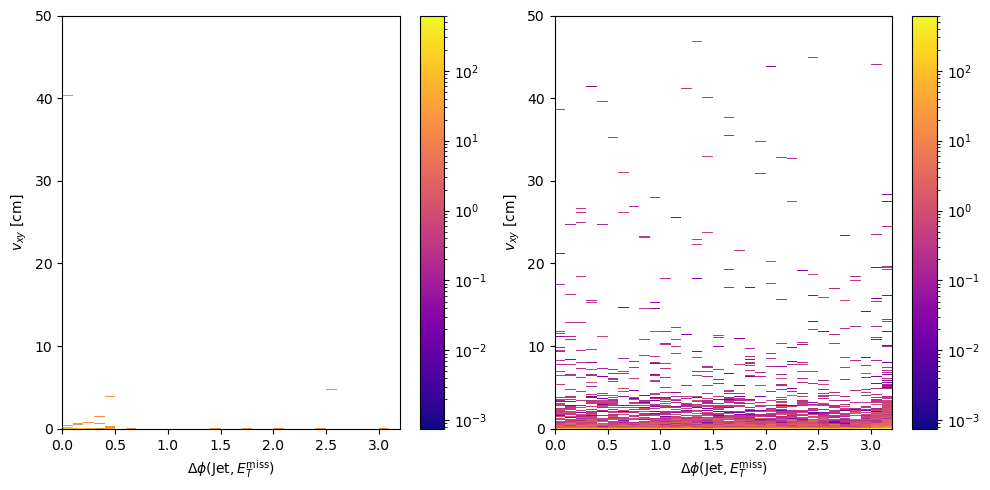

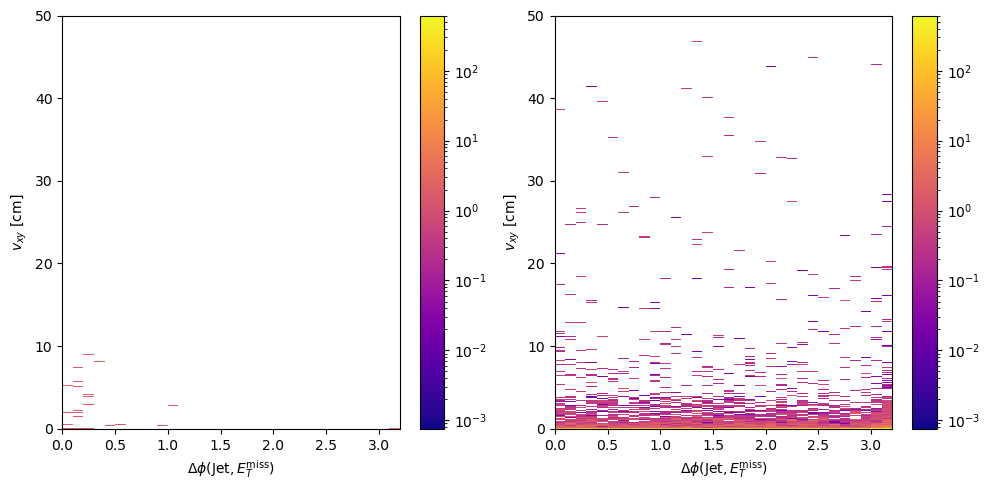

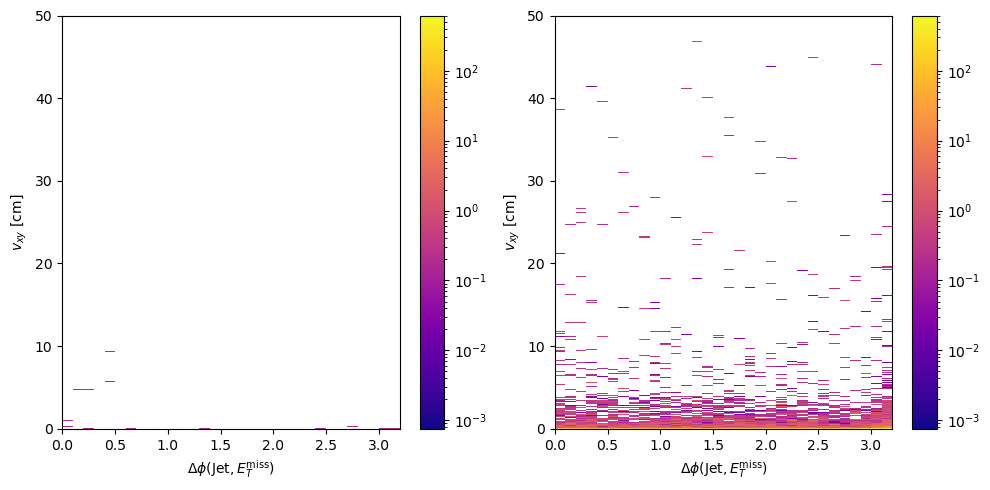

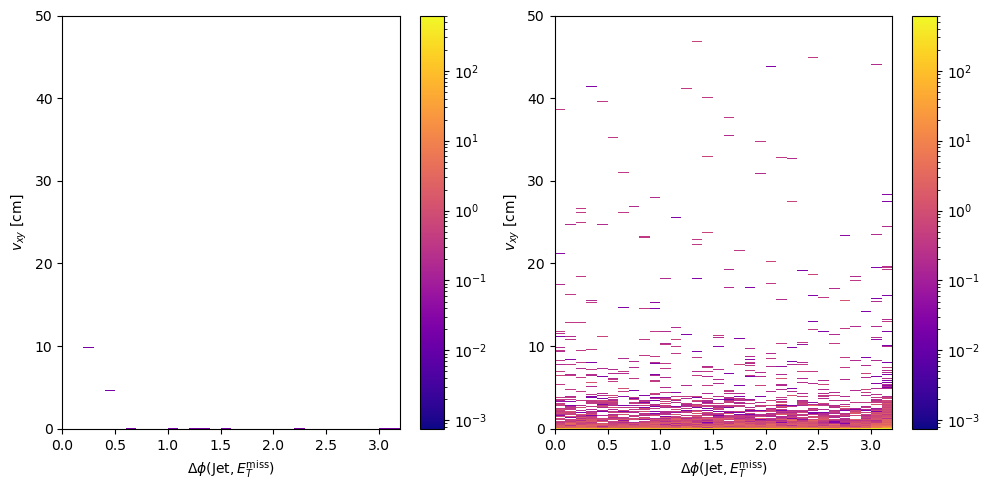

In [36]:
from matplotlib.colors import LogNorm
ctaus = [1,10,100,1000]
hname = 'sel_vtx_METdPhi_vs_vxy'
for ct in ctaus:
    hs = sig[hname][{"samp":f"sig_2018_Mchi-42p0_dMchi-4p0_ctau-{ct}","cut":"cut13"}]
    hb = sum([bkg[hname][k] for k in bkg[hname].keys()])[{"cut":"cut13"}]
    vmin = min(hs.values()[hs.values()>0].min(),hb.values()[hb.values()>0].min())
    vmax = max(hs.values()[hs.values()>0].max(),hb.values()[hb.values()>0].max())
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    hs.plot2d(norm=LogNorm(vmin=vmin,vmax=vmax),cmap='plasma')
    #cb = plt.gca().images[-1].colorbar
    #plt.ylim([0,3])
    plt.subplot(122)
    hb.plot2d(norm=LogNorm(vmin=vmin,vmax=vmax),cmap='plasma')
    plt.tight_layout()
    #plt.ylim([0,3])